In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data= pd.read_csv(r'titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.shape

(1309, 12)

In [4]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.377387,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.484918,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [7]:
# Cleaning Data
missing_data = data.isnull().sum()
missing_data

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [8]:
data = data.drop_duplicates()
data.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [9]:
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')
data['Fare'] = pd.to_numeric(data['Fare'], errors='coerce')

In [10]:
# Exploratory Data Analysis (EDA)
summary_stats = data.describe()
print(summary_stats)

       PassengerId     Survived       Pclass          Age        SibSp  \
count  1309.000000  1309.000000  1309.000000  1046.000000  1309.000000   
mean    655.000000     0.377387     2.294882    29.881138     0.498854   
std     378.020061     0.484918     0.837836    14.413493     1.041658   
min       1.000000     0.000000     1.000000     0.170000     0.000000   
25%     328.000000     0.000000     2.000000    21.000000     0.000000   
50%     655.000000     0.000000     3.000000    28.000000     0.000000   
75%     982.000000     1.000000     3.000000    39.000000     1.000000   
max    1309.000000     1.000000     3.000000    80.000000     8.000000   

             Parch         Fare  
count  1309.000000  1308.000000  
mean      0.385027    33.295479  
std       0.865560    51.758668  
min       0.000000     0.000000  
25%       0.000000     7.895800  
50%       0.000000    14.454200  
75%       0.000000    31.275000  
max       9.000000   512.329200  


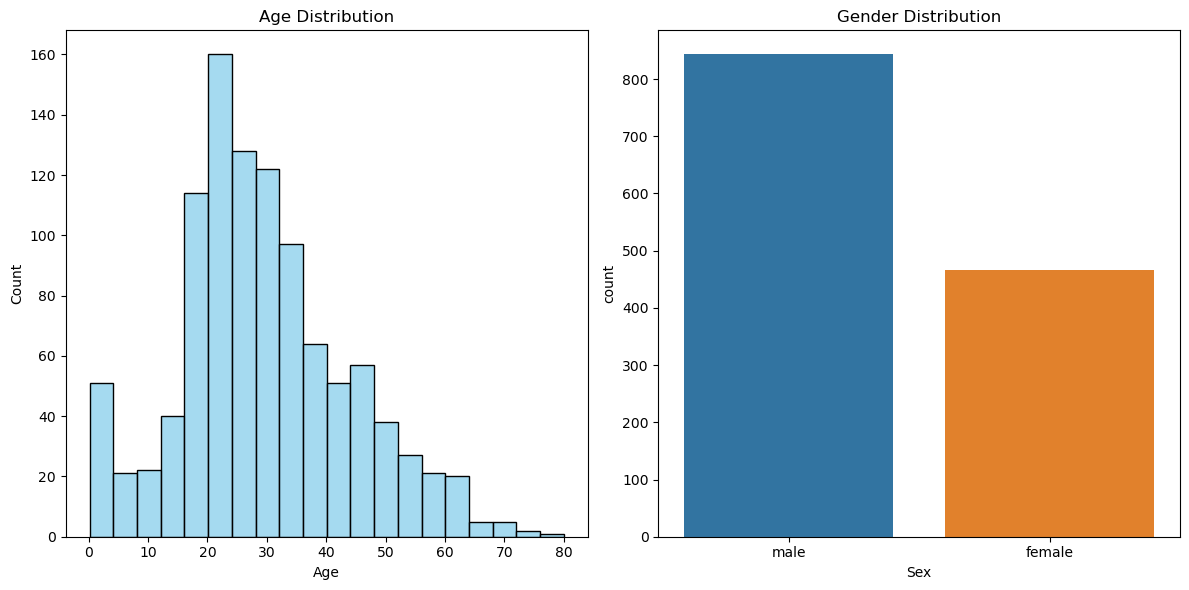

In [14]:
# Univariate Analysis:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data['Age'].dropna(), kde=False, bins=20, color='skyblue')
plt.title('Age Distribution')

plt.subplot(1, 2, 2)
sns.countplot(x='Sex', data=data)
plt.title('Gender Distribution')

plt.tight_layout()
plt.show()

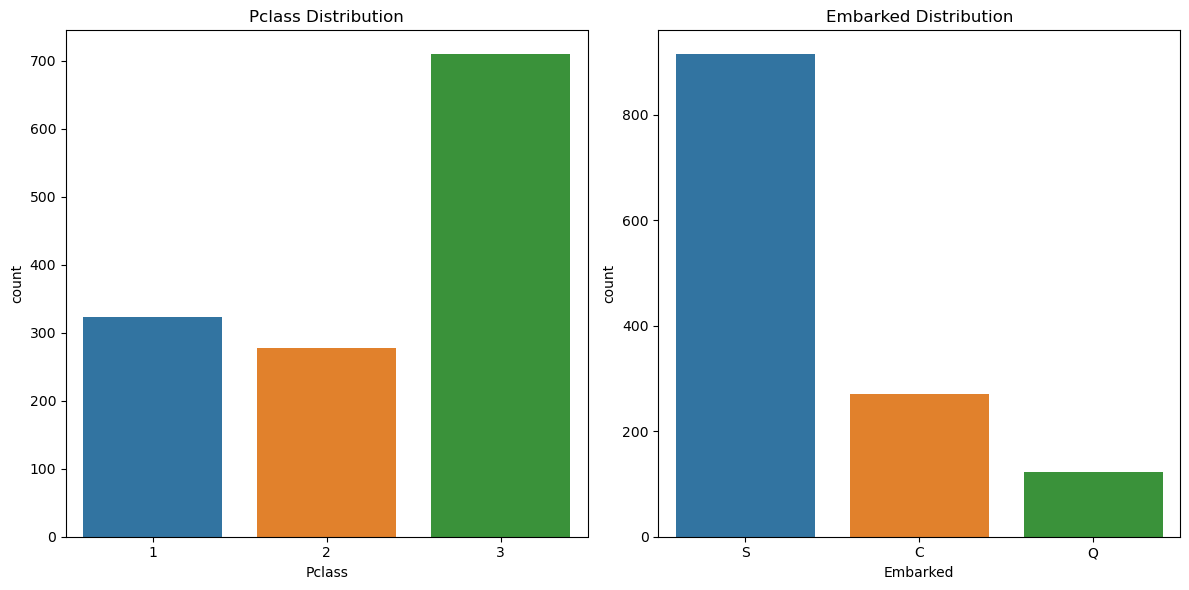

In [16]:
# Categorical Variables:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.countplot(x='Pclass', data=data)
plt.title('Pclass Distribution')

plt.subplot(1, 2, 2)
sns.countplot(x='Embarked', data=data)
plt.title('Embarked Distribution')

plt.tight_layout()
plt.show()

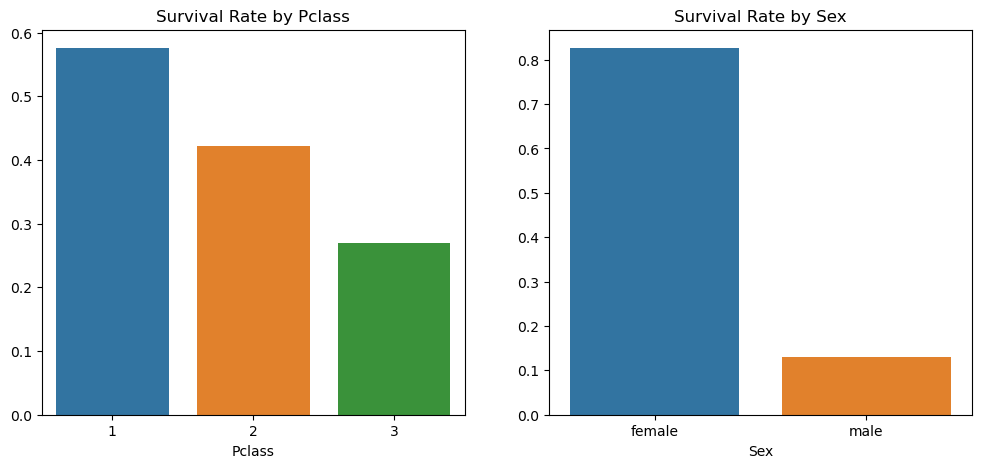

In [17]:
# Survival Analysis:
survival_rate_by_class = data.groupby('Pclass')['Survived'].mean()
survival_rate_by_sex = data.groupby('Sex')['Survived'].mean()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.barplot(x=survival_rate_by_class.index, y=survival_rate_by_class.values)
plt.title('Survival Rate by Pclass')
plt.subplot(1, 2, 2)
sns.barplot(x=survival_rate_by_sex.index, y=survival_rate_by_sex.values)
plt.title('Survival Rate by Sex')
plt.show()

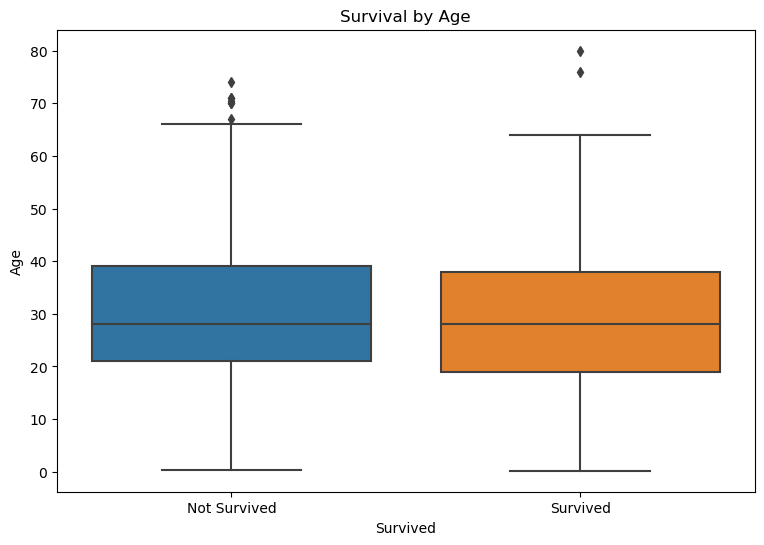

In [18]:
# Visualizing Survival by Age:
plt.figure(figsize=(9, 6))
sns.boxplot(x='Survived', y='Age', data=data)
plt.title('Survival by Age')
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.show()

In [19]:
data['FamilySize'] = data['SibSp'] + data['Parch']


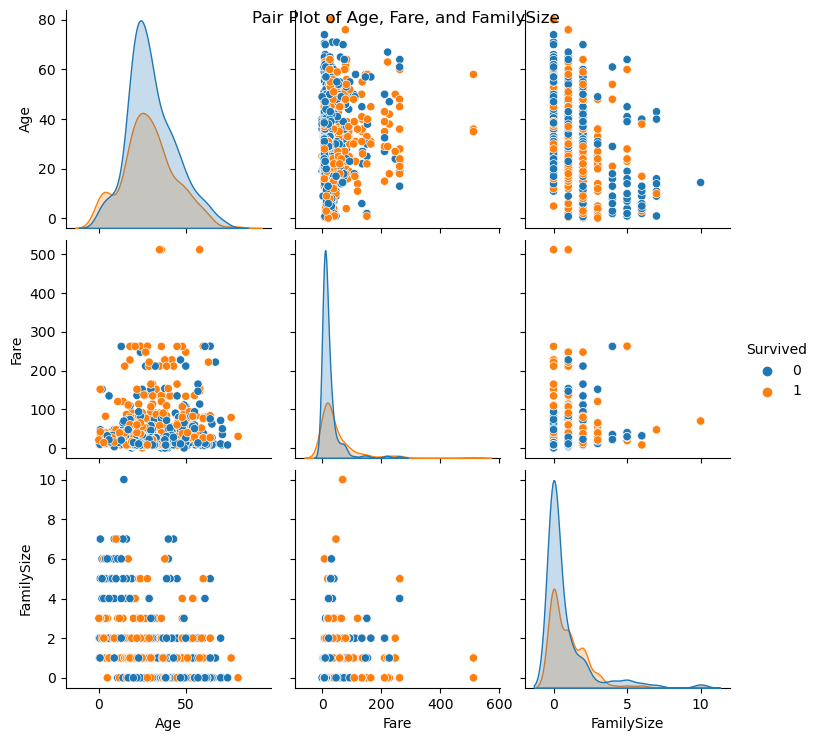

In [20]:
sns.pairplot(data, vars=['Age', 'Fare', 'FamilySize'], hue='Survived')
plt.suptitle('Pair Plot of Age, Fare, and FamilySize')
plt.show()

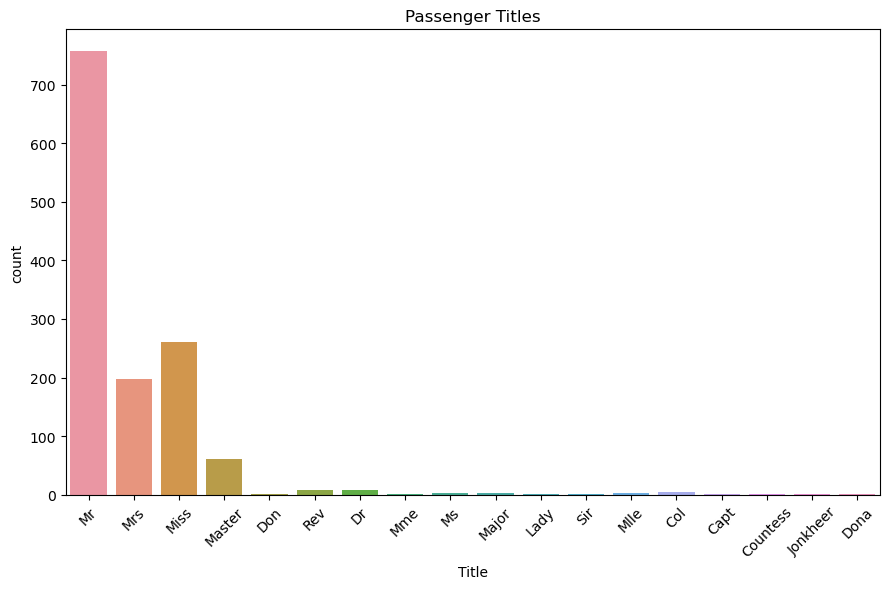

In [22]:
plt.figure(figsize=(9, 6))

# Extracting titles from names
data['Title'] = data['Name'].str.extract(' ([A-Za-z]+)\.')

plt.subplot(1, 1, 1)
sns.countplot(x='Title', data=data)
plt.title('Passenger Titles')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

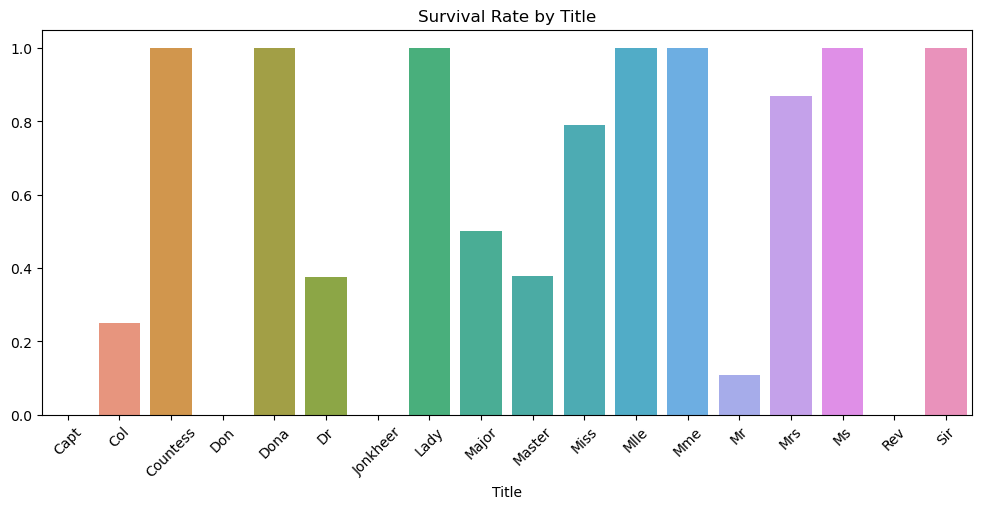

In [23]:
# Survival by Title:
title_survival_rate = data.groupby('Title')['Survived'].mean()
plt.figure(figsize=(12, 5))
sns.barplot(x=title_survival_rate.index, y=title_survival_rate.values)
plt.title('Survival Rate by Title')
plt.xticks(rotation=45)
plt.show()